In [1]:
from matplotlib.pyplot import cm
import numpy as np
import osmnx as ox
import networkx as nx

C:\Users\serha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Download the road network
G = ox.graph_from_place('Bremen, Germany', network_type='drive')

In [3]:
randoms = ox.utils_geo.sample_points(G, 50)
vegetation = list(zip(randoms.x.astype(float), randoms.y.astype(float)))

C:\Users\serha\anaconda3\lib\site-packages\osmnx\utils_geo.py:45: UserWarning: graph should be undirected to not oversample bidirectional edges
  warnings.warn("graph should be undirected to not oversample bidirectional edges")
C:\Users\serha\anaconda3\lib\site-packages\osmnx\utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)


In [4]:
# Starting and ending point of a trip
start = [8.185539352132764,38.606855578588329]
endpoints = vegetation

In [26]:
endpoints[-5:]

[(8.914131780972596, 53.121038022786855),
 (8.950598967559076, 53.05965621619668),
 (8.88646136992669, 53.061043442479146),
 (8.757094719124135, 53.12726571394983),
 (8.755823961438587, 53.11361364288417)]

In [28]:
[(endpoints[3][0]-endpoints[2][0],endpoints[3][1]-endpoints[2][1]),(endpoints[4][0]-endpoints[3][0],endpoints[4][1]-endpoints[3][1])]

[(-0.22921066640211585, 0.08100168795485985),
 (0.1438233210826141, -0.05398954871030526)]

In [30]:
# Retrieve nearest nodes
nodes = []
for i in endpoints:
    nodes.append(ox.nearest_nodes(G, start, i))
nodes[:5]

[[1437748760, 253212383],
 [1437748760, 253212383],
 [1437748760, 253212383],
 [1437748760, 253212383],
 [1437748760, 253212383]]

In [6]:
# Compute the paths of the trip
route_list = []
for i in nodes: 
    route = nx.shortest_path(G, i[0], i[1], weight='length')
    route_list.append(route)

In [7]:
lengths = []
for i in nodes:
    length = nx.shortest_path_length(G, i[0], i[1], weight='length')
    lengths.append(length)

print(lengths)

[20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002, 20102.688000000002]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

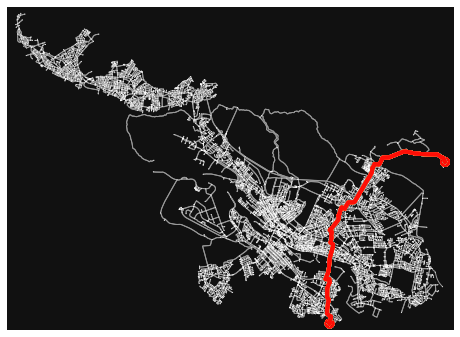

In [8]:
# Plot the trip
rc = cm.rainbow(np.linspace(0,1,len(route_list)))
fig, ax = ox.plot_graph_routes(G,
                              route_list,route_colors=rc,edge_linewidth=1,
                              node_size=1,
                              route_linewidth=6)